In [475]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdullrahmannawasrah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abdullrahmannawasrah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [476]:
import pandas as pd 
import gensim
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec

In [532]:
corpus=pd.read_csv("full.csv")
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,Now all @Apple has to do is get swype on the i...
1,positive,1.260000e+17,@Apple will be adding more carrier support to ...
2,positive,1.260000e+17,Hilarious @youtube video - guy does a duet wit...
3,positive,1.260000e+17,@RIM you made it too easy for me to switch to ...
4,positive,1.260000e+17,I just realized that the reason I got into twi...
...,...,...,...
4644,irrelevant,1.270000e+17,me re copè con #twitter
4645,irrelevant,1.270000e+17,Buenas noches genteeee :) #twitter los quieroo...
4646,irrelevant,1.270000e+17,#twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,Oi @flaviasansi. Muito bem vinda ao meu #Twitt...


# Lower the letters

In [533]:
corpus['TweetText']=corpus['TweetText'].str.lower()
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,now all @apple has to do is get swype on the i...
1,positive,1.260000e+17,@apple will be adding more carrier support to ...
2,positive,1.260000e+17,hilarious @youtube video - guy does a duet wit...
3,positive,1.260000e+17,@rim you made it too easy for me to switch to ...
4,positive,1.260000e+17,i just realized that the reason i got into twi...
...,...,...,...
4644,irrelevant,1.270000e+17,me re copè con #twitter
4645,irrelevant,1.270000e+17,buenas noches genteeee :) #twitter los quieroo...
4646,irrelevant,1.270000e+17,#twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,oi @flaviasansi. muito bem vinda ao meu #twitt...


# Remove stopwords

In [534]:
stop_words = stopwords.words('english')

In [535]:
corpus['TweetText'] = corpus['TweetText'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,@apple get swype iphone crack. iphone
1,positive,1.260000e+17,@apple adding carrier support iphone 4s (just ...
2,positive,1.260000e+17,hilarious @youtube video - guy duet @apple 's ...
3,positive,1.260000e+17,@rim made easy switch @apple iphone. see ya!
4,positive,1.260000e+17,realized reason got twitter ios5 thanks @apple
...,...,...,...
4644,irrelevant,1.270000e+17,copè con #twitter
4645,irrelevant,1.270000e+17,buenas noches genteeee :) #twitter los quieroo...
4646,irrelevant,1.270000e+17,#twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,oi @flaviasansi. muito bem vinda ao meu #twitt...


# Remove punctuations

In [536]:
corpus['TweetText']= corpus['TweetText'].str.replace(r'[^\w\s]+', ' ',regex=True)
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,apple get swype iphone crack iphone
1,positive,1.260000e+17,apple adding carrier support iphone 4s just ...
2,positive,1.260000e+17,hilarious youtube video guy duet apple s ...
3,positive,1.260000e+17,rim made easy switch apple iphone see ya
4,positive,1.260000e+17,realized reason got twitter ios5 thanks apple
...,...,...,...
4644,irrelevant,1.270000e+17,copè con twitter
4645,irrelevant,1.270000e+17,buenas noches genteeee twitter los quierooo
4646,irrelevant,1.270000e+17,twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,oi flaviasansi muito bem vinda ao meu twitt...


In [537]:
corpus['TweetText']= corpus['TweetText'].str.replace(r'\n',  '',regex=True)
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,apple get swype iphone crack iphone
1,positive,1.260000e+17,apple adding carrier support iphone 4s just ...
2,positive,1.260000e+17,hilarious youtube video guy duet apple s ...
3,positive,1.260000e+17,rim made easy switch apple iphone see ya
4,positive,1.260000e+17,realized reason got twitter ios5 thanks apple
...,...,...,...
4644,irrelevant,1.270000e+17,copè con twitter
4645,irrelevant,1.270000e+17,buenas noches genteeee twitter los quierooo
4646,irrelevant,1.270000e+17,twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,oi flaviasansi muito bem vinda ao meu twitt...


In [538]:
corpus['TweetText']= corpus['TweetText'].str.replace(r'\t',  ' ',regex=True)
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,apple get swype iphone crack iphone
1,positive,1.260000e+17,apple adding carrier support iphone 4s just ...
2,positive,1.260000e+17,hilarious youtube video guy duet apple s ...
3,positive,1.260000e+17,rim made easy switch apple iphone see ya
4,positive,1.260000e+17,realized reason got twitter ios5 thanks apple
...,...,...,...
4644,irrelevant,1.270000e+17,copè con twitter
4645,irrelevant,1.270000e+17,buenas noches genteeee twitter los quierooo
4646,irrelevant,1.270000e+17,twitter tiene la mala costumbre de ponerce bn...
4647,irrelevant,1.270000e+17,oi flaviasansi muito bem vinda ao meu twitt...


# Type of each column

In [539]:
corpus.dtypes

Sentiment     object
TweetId      float64
TweetText     object
dtype: object

In [540]:
corpus['Sentiment'].value_counts()

neutral       2228
irrelevant    1655
negative       437
positive       329
Name: Sentiment, dtype: int64

In [541]:
sents = corpus['TweetText']
Labels = corpus['Sentiment']

# Remove or ignore the irrelevant in the setiment 

In [542]:
corpus['Sentiment'] = corpus['Sentiment'].str.replace('irrelevant', '')


In [543]:
corpus

,Sentiment,TweetId,TweetText
0,positive,1.260000e+17,apple get swype iphone crack iphone
1,positive,1.260000e+17,apple adding carrier support iphone 4s just ...
2,positive,1.260000e+17,hilarious youtube video guy duet apple s ...
3,positive,1.260000e+17,rim made easy switch apple iphone see ya
4,positive,1.260000e+17,realized reason got twitter ios5 thanks apple
...,...,...,...
4644,,1.270000e+17,copè con twitter
4645,,1.270000e+17,buenas noches genteeee twitter los quierooo
4646,,1.270000e+17,twitter tiene la mala costumbre de ponerce bn...
4647,,1.270000e+17,oi flaviasansi muito bem vinda ao meu twitt...


# Vectorization

In [546]:
tv = TfidfVectorizer(max_features = 5000)
sents = list(sents)
sents = tv.fit_transform(sents).toarray()

# Gaussuan Naive Bayes

In [547]:
gnb = GaussianNB()
gnb.fit(sents, Labels)

GaussianNB()

In [548]:
predict=gnb.predict(sents)


In [495]:
print(accuracy_score(Labels,predict))
print(classification_report(Labels,predict)) 


0.8859969885996989
              precision    recall  f1-score   support

                   0.98      0.95      0.96      1655
    negative       0.69      0.95      0.80       437
     neutral       1.00      0.81      0.89      2228
    positive       0.52      1.00      0.68       329

    accuracy                           0.89      4649
   macro avg       0.80      0.93      0.84      4649
weighted avg       0.93      0.89      0.89      4649



# Working in test data

In [518]:
test_data = pd.read_excel("testing_data.xlsx")


In [519]:
test_data.columns =['TweetId', 'TweetText']
test_data

,TweetId,TweetText
0,1.263503e+17,"Hey @apple, if you send me a free iPhone (any ..."
1,1.263497e+17,Thank you @apple for Find My Mac - just locate...
2,1.263423e+17,Thanks to @Apple Covent Garden #GeniusBar for ...
3,1.263258e+17,@DailyDealChat @apple Thanks!!
4,1.263242e+17,iPads Replace Bound Playbooks on Some N.F.L. T...
...,...,...
458,1.268832e+17,RT......zZzZzZzZzZzZzZzZzZzZ...... #Twitter off
459,1.268832e+17,Ha! Even #twitter is telling me we're meant to...
460,1.268832e+17,Sleep time. #twitter off
461,1.268831e+17,#Twitter should have Emoticons


In [520]:
test_data['TweetText']=test_data['TweetText'].str.lower()
test_data

,TweetId,TweetText
0,1.263503e+17,"hey @apple, if you send me a free iphone (any ..."
1,1.263497e+17,thank you @apple for find my mac - just locate...
2,1.263423e+17,thanks to @apple covent garden #geniusbar for ...
3,1.263258e+17,@dailydealchat @apple thanks!!
4,1.263242e+17,ipads replace bound playbooks on some n.f.l. t...
...,...,...
458,1.268832e+17,rt......zzzzzzzzzzzzzzzzzzzz...... #twitter off
459,1.268832e+17,ha! even #twitter is telling me we're meant to...
460,1.268832e+17,sleep time. #twitter off
461,1.268831e+17,#twitter should have emoticons


In [521]:
test_data['TweetText'] = test_data['TweetText'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
test_data

,TweetId,TweetText
0,1.263503e+17,"hey @apple, send free iphone (any version do),..."
1,1.263497e+17,thank @apple find mac - located wiped stolen a...
2,1.263423e+17,thanks @apple covent garden #geniusbar replaci...
3,1.263258e+17,@dailydealchat @apple thanks!!
4,1.263242e+17,ipads replace bound playbooks n.f.l. teams htt...
...,...,...
458,1.268832e+17,rt......zzzzzzzzzzzzzzzzzzzz...... #twitter
459,1.268832e+17,ha! even #twitter telling we're meant be!
460,1.268832e+17,sleep time. #twitter
461,1.268831e+17,#twitter emoticons


In [522]:
test_data['TweetText']= test_data['TweetText'].str.replace(r'[^\w\s]+', ' ',regex=True)
test_data

,TweetId,TweetText
0,1.263503e+17,hey apple send free iphone any version do ...
1,1.263497e+17,thank apple find mac located wiped stolen a...
2,1.263423e+17,thanks apple covent garden geniusbar replaci...
3,1.263258e+17,dailydealchat apple thanks
4,1.263242e+17,ipads replace bound playbooks n f l teams htt...
...,...,...
458,1.268832e+17,rt zzzzzzzzzzzzzzzzzzzz twitter
459,1.268832e+17,ha even twitter telling we re meant be
460,1.268832e+17,sleep time twitter
461,1.268831e+17,twitter emoticons


In [523]:
test_data['TweetText']= test_data['TweetText'].str.replace(r'\n',  '',regex=True)
test_data

,TweetId,TweetText
0,1.263503e+17,hey apple send free iphone any version do ...
1,1.263497e+17,thank apple find mac located wiped stolen a...
2,1.263423e+17,thanks apple covent garden geniusbar replaci...
3,1.263258e+17,dailydealchat apple thanks
4,1.263242e+17,ipads replace bound playbooks n f l teams htt...
...,...,...
458,1.268832e+17,rt zzzzzzzzzzzzzzzzzzzz twitter
459,1.268832e+17,ha even twitter telling we re meant be
460,1.268832e+17,sleep time twitter
461,1.268831e+17,twitter emoticons


In [524]:
test_data['TweetText']= test_data['TweetText'].str.replace(r'\t',  ' ',regex=True)
test_data

,TweetId,TweetText
0,1.263503e+17,hey apple send free iphone any version do ...
1,1.263497e+17,thank apple find mac located wiped stolen a...
2,1.263423e+17,thanks apple covent garden geniusbar replaci...
3,1.263258e+17,dailydealchat apple thanks
4,1.263242e+17,ipads replace bound playbooks n f l teams htt...
...,...,...
458,1.268832e+17,rt zzzzzzzzzzzzzzzzzzzz twitter
459,1.268832e+17,ha even twitter telling we re meant be
460,1.268832e+17,sleep time twitter
461,1.268831e+17,twitter emoticons


In [525]:
test_data['sentiment'] = pd.Series(predict)
test_data()

,TweetId,TweetText,sentiment
0,1.263503e+17,hey apple send free iphone any version do ...,positive
1,1.263497e+17,thank apple find mac located wiped stolen a...,positive
2,1.263423e+17,thanks apple covent garden geniusbar replaci...,positive
3,1.263258e+17,dailydealchat apple thanks,positive
4,1.263242e+17,ipads replace bound playbooks n f l teams htt...,positive
...,...,...,...
458,1.268832e+17,rt zzzzzzzzzzzzzzzzzzzz twitter,neutral
459,1.268832e+17,ha even twitter telling we re meant be,neutral
460,1.268832e+17,sleep time twitter,neutral
461,1.268831e+17,twitter emoticons,neutral


In [526]:
sents_test = test_data['TweetText']
Labels_tesst = test_data['sentiment']

In [527]:
tv = TfidfVectorizer(max_features = 5000)
sents_test = list(sents_test)
sents_test = tv.fit_transform(sents_test).toarray()

# Gaussuan Naive Bayes

In [528]:
gnb = GaussianNB()
gnb.fit(sents_test, Labels_tesst)

GaussianNB()

In [529]:
predict=gnb.predict(sents_test)

In [530]:
print(accuracy_score(Labels_tesst,predict))
print(classification_report(Labels_tesst,predict)) 

0.9892008639308856
              precision    recall  f1-score   support

    negative       1.00      0.99      0.99       274
     neutral       0.99      0.99      0.99       145
    positive       0.92      1.00      0.96        44

    accuracy                           0.99       463
   macro avg       0.97      0.99      0.98       463
weighted avg       0.99      0.99      0.99       463



As we can see from the results Gaussuan Naive Bayes model is giving  accuracy of 98% in testing data.

<AxesSubplot:>

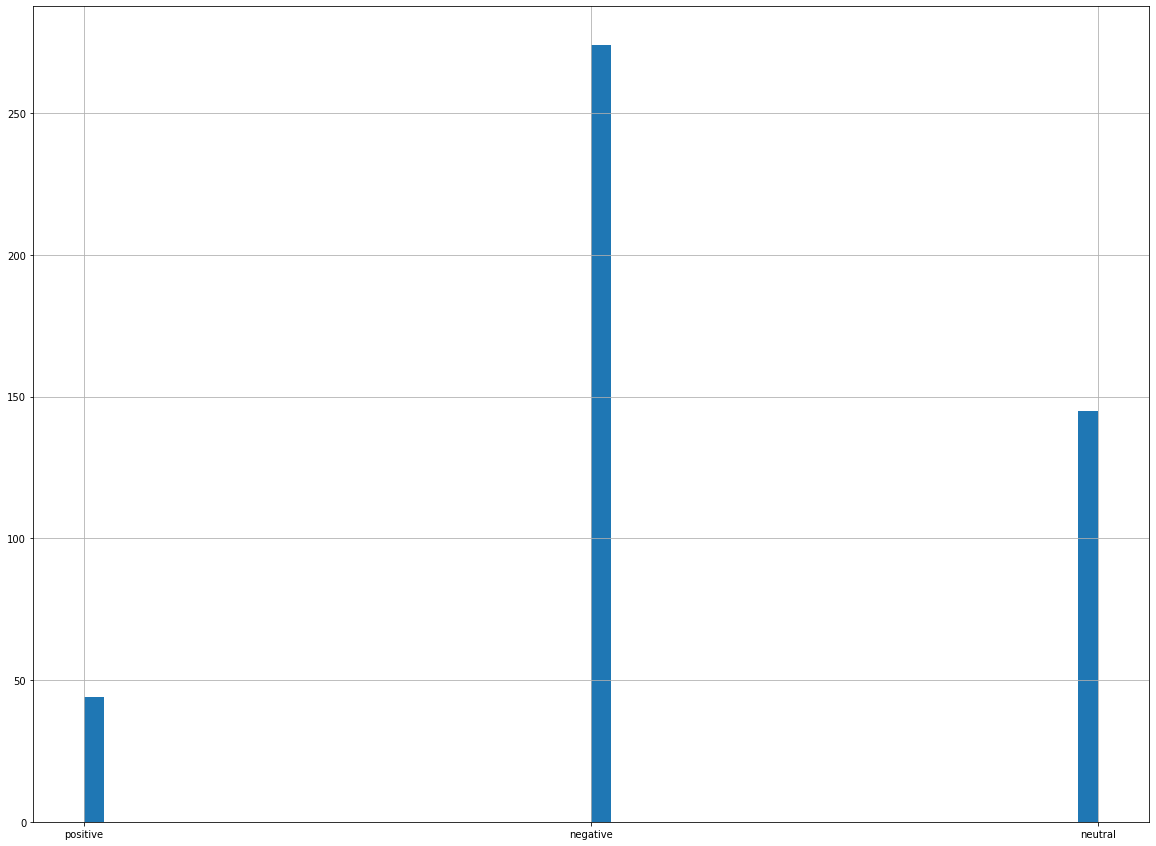

In [549]:
Labels_tesst.hist( bins=50, figsize=(20,15)) 